In [4]:
import os

import pandas as pd
import autonormalize as an

In [5]:
crime_df = pd.read_csv(os.path.join(os.getcwd(), 'autonormalize/downloads/crime.csv'))
crime_df = crime_df.drop(columns=crime_df.columns[10:])
crime_df = crime_df.dropna()
crime_df = crime_df.drop_duplicates()
print("Rows: "+ str(crime_df.shape[0]))
print("Columns: " + str(crime_df.shape[1]))
crime_df.head(3)

Rows: 638454
Columns: 10


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter


In [6]:
deps_approx = an.find_dependencies(crime_df, 0.94)
print(deps_approx)


100%|██████████| 9/9 [32:31<00:00, 104.99s/it]

 --> Record ID
 {Agency Type,Agency Name}  {Agency Name,City}  {Record ID}  {Agency Name,Year,Month}  {Agency Name,State}  --> Agency Code
 {Agency Code}  {Record ID}  --> Agency Name
 {Agency Name}  {Agency Code}  {Record ID}  --> Agency Type
 {Agency Name}  {Agency Code}  {Record ID}  --> City
 {City,Crime Type,Year,Month}  {Agency Type,Agency Name}  {Agency Name,City}  {Agency Name,Year}  {Record ID}  {Agency Code}  {Agency Type,City,Year}  {Year,City,Month,Incident}  --> State
 {Record ID}  --> Year
 {Record ID}  --> Month
 {Record ID}  --> Incident
 {Agency Type}  {Record ID}  {City}  {Year}  {Agency Name}  {Month}  {Agency Code}  {Incident}  {State}  --> Crime Type


In [7]:
entityset = an.make_entityset(crime_df, deps_approx, name="crime records")

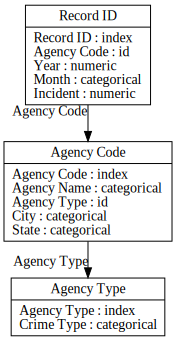

In [8]:
entityset.plot()

In [9]:
import featuretools as ft
fm, features = ft.dfs(entityset=entityset, target_entity='Agency Name_State')
features

KeyError: 'Provided target entity Agency Name_State does not exist in crime records'